In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

In [2]:
data = pd.read_csv('../data/admission.csv')
display(data)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


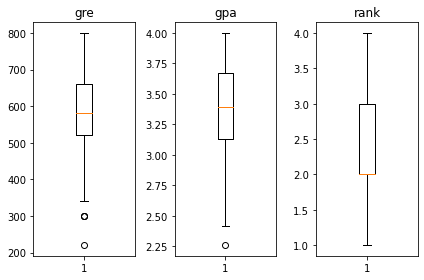

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
394,1,460,3.99,3
395,0,620,4.00,2
396,0,560,3.04,3
398,0,700,3.65,2


In [3]:
# 결측치 확인
data.isnull().sum()

# 이상치 확인
fig= plt.figure()
fig_gre = fig.add_subplot(1,3,1)
fig_gpa = fig.add_subplot(1,3,2)
fig_rank = fig.add_subplot(1,3,3)

fig_gre.set_title('gre')
fig_gre.boxplot(data['gre'])

fig_gpa.set_title('gpa')
fig_gpa.boxplot(data['gpa'])

fig_rank.set_title('rank')
fig_rank.boxplot(data['rank'])

fig.tight_layout()
plt.show()

# 이상치 제거(Z-score)
zscore_threshold = 2.0

for col in data.columns:
    outlier = data.loc[np.abs(stats.zscore(data[col])) > zscore_threshold, col]
    data = data.loc[~data[col].isin(outlier)]
    
display(data)

In [4]:
x_data = data.drop('admit', axis=1, inplace=False).values
t_data = data['admit'].values.reshape(-1,1)

In [5]:
# 정규화
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

- Python

In [6]:
def numerical_derivative(f, x):
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        
        tmp = x[idx] 
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
        
    return derivative_x

# W & b
W_p = np.random.rand(3,1)
b_p = np.random.rand(1)

# loss function
def loss_func(input_obj):
    input_W = input_obj[:-1].reshape(-1,1)
    input_b = input_obj[-1:]
    
    z = np.dot(scaled_x_data, input_W) + input_b
    y = 1 / (1 + np.exp(-1 * z))
    
    delta = 1e-7
    return -np.sum(t_data*np.log(y+delta) + (1-t_data)*np.log(1-y+delta))

# learning rate
learning_rate = 1e-4

# learning
for step in range(300000):
    input_param = np.concatenate((W_p.ravel(), b_p.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W_p = W_p - derivative_result[:-1].reshape(-1,1)
    b_p = b_p - derivative_result[-1:]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W_p.ravel(), b_p.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W_p.ravel(), b_p.ravel(), 
                                                 loss_func(input_param)))

W : [0.22763536 0.43244794 0.57059299], b : [0.71136372], loss : 443.7744926188201
W : [ 1.07517834  1.12941185 -1.61511616], b : [-1.25305005], loss : 221.2156000911317
W : [ 1.07526591  1.12942595 -1.61508269], b : [-1.25312616], loss : 221.21560006866997
W : [ 1.07526592  1.12942595 -1.61508268], b : [-1.25312617], loss : 221.21560006866997
W : [ 1.07526592  1.12942595 -1.61508268], b : [-1.25312617], loss : 221.21560006866997
W : [ 1.07526592  1.12942595 -1.61508268], b : [-1.25312617], loss : 221.21560006866997
W : [ 1.07526592  1.12942595 -1.61508268], b : [-1.25312617], loss : 221.21560006866997
W : [ 1.07526592  1.12942595 -1.61508268], b : [-1.25312617], loss : 221.21560006866997
W : [ 1.07526592  1.12942595 -1.61508268], b : [-1.25312617], loss : 221.21560006866997
W : [ 1.07526592  1.12942595 -1.61508268], b : [-1.25312617], loss : 221.21560006866997


In [7]:
# prediction
def logistic_predict(x):
    
    z = np.dot(x, W_p) + b_p
    y = 1 / (1 + np.exp(-1 * z))
    
    if y < 0.5:
        result = 0
    else:
        result = 1
        
    return result, y

test_data = np.array([600, 3.8, 1]).reshape(-1,3)
scaled_test_data = scaler_x.transform(test_data)
print(logistic_predict(scaled_test_data))

(1, array([[0.57333869]]))


- Tensorflow

In [12]:
# placehlode
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# W & b
W = tf.Variable(tf.random.normal([3,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# H
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# loss func
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# sess
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
# learning
for step in range(300000):
    
    _,W_val,b_val,loss_val = sess.run([train,W,b,loss], 
                                      feed_dict={X : scaled_x_data, T : t_data})
    
    if step % 30000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W_val,b_val,loss_val))

W : [[ 0.20611058]
 [ 0.5166177 ]
 [-1.172187  ]], b : [-0.7782765], loss : 0.5937080383300781
W : [[ 0.2774131 ]
 [ 0.58564204]
 [-1.1734513 ]], b : [-0.7188809], loss : 0.5888700485229492
W : [[ 0.31826106]
 [ 0.6220661 ]
 [-1.1961505 ]], b : [-0.70992696], loss : 0.5876333713531494
W : [[ 0.34877387]
 [ 0.64755577]
 [-1.2247608 ]], b : [-0.71639365], loss : 0.5868208408355713
W : [[ 0.3753293]
 [ 0.6690201]
 [-1.253371 ]], b : [-0.72747636], loss : 0.5861217975616455
W : [[ 0.39999095]
 [ 0.68868965]
 [-1.2801628 ]], b : [-0.73999333], loss : 0.5854998230934143
W : [[ 0.42329806]
 [ 0.70672923]
 [-1.3051968 ]], b : [-0.7525103], loss : 0.5849458575248718
W : [[ 0.4455305]
 [ 0.7246106]
 [-1.329285 ]], b : [-0.7650273], loss : 0.5844368934631348
W : [[ 0.46673506]
 [ 0.74070966]
 [-1.3507427 ]], b : [-0.7768535], loss : 0.5839930176734924
W : [[ 0.48690677]
 [ 0.7566464 ]
 [-1.3722004 ]], b : [-0.78796244], loss : 0.5835819840431213


In [14]:
# prediction
test_data = np.array([600,3.8,1]).reshape(-1,3)
scaled_test_data = scaler_x.transform(test_data)
print(sess.run(H, feed_dict={X : scaled_test_data}))

[[0.53350747]]


- Sklearn

In [11]:
model = linear_model.LogisticRegression()
model.fit(x_data, t_data.ravel())

test_data = np.array([600,3.8,1]).reshape(-1,3)

predict_result = model.predict(test_data)
predict_proba = model.predict_proba(test_data)
print(predict_result, predict_proba)

[1] [[0.43740782 0.56259218]]
